**Import the libraries Needed**


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting


np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

#Import libraries for plotting confusion metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#Import libraries for hyperparameter tuning
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

#Import SVM
from sklearn.svm import SVC

#Import library for logistic regression
from sklearn.linear_model import LogisticRegression

#Import libraries to remove outliers
from sklearn.ensemble import IsolationForest

#Import feature selection library
#!pip install pymrmr
import pymrmr

%matplotlib inline

**Define the user defined functions**
Later put them in a module 

In [0]:
#Write a function to implement SVC
def custom_svc(dt,target,kernel = 'linear',cache_size=200,max_iter=-1,class_weight=None,C=1):
    X= dt.drop(target, 1)
    y = dt[target] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=10) #split the data
    model = SVC(C=C, cache_size=cache_size, class_weight=class_weight, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
        kernel=kernel, max_iter=max_iter, probability=True, random_state=0,
        shrinking=True, tol=0.001, verbose=False)
    model.fit(X_train, y_train)
    # Use score method to get accuracy of model
    score = model.score(X_test, y_test)
    print(score)
    
    #Get the prediction results
    y_predict = model.predict(X_test)
    y_pred_quant = model.predict_proba(X_test)
    y_pred_bin = model.predict(X_test)

    #Show the confusion matrix
    #Create the confusion matrics
    cm = metrics.confusion_matrix(y_test, y_pred_bin)
    
    return score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test

In [0]:
#Write a function to implement logistic regression
def custom_logistic_regression(dt,target,max_iter=-1,class_weight=None,C=1.0):
    X= dt.drop(target, 1)
    y = dt[target] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=10) #split the data
    model = LogisticRegression(C=C, class_weight=class_weight, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=max_iter,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
    #Fit the model
    model.fit(X_train, y_train)
    # Use score method to get accuracy of model
    score = model.score(X_test, y_test)
    print(score)
    
    #Get the prediction results
    y_predict = model.predict(X_test)
    y_pred_quant = model.predict_proba(X_test)
    y_pred_bin = model.predict(X_test)

    #Show the confusion matrix
    #Create the confusion matrics
    cm = metrics.confusion_matrix(y_test, y_pred_bin)
    
    return score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test

In [0]:
#Write a function to implement random forest
def custom_random_forest(dt,target,max_depth=10, n_estimators=100,class_weight=None):
    X= dt.drop(target, 1)
    y = dt[target] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=10) #split the data
    model = RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='gini',
                       max_depth=max_depth, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=n_estimators,
                       n_jobs=None, oob_score=False, random_state=0,
                       verbose=0, warm_start=False)
    model.fit(X_train, y_train)
    # Use score method to get accuracy of model
    score = model.score(X_test, y_test)
    print(score)
    
    #Get the prediction results
    y_predict = model.predict(X_test)
    y_pred_quant = model.predict_proba(X_test)
    y_pred_bin = model.predict(X_test)

    #Show the confusion matrix
    #Create the confusion matrics
    cm = metrics.confusion_matrix(y_test, y_pred_bin)
    
    #Determine the feature importances
    # Get numerical feature importances
    importances = list(model.feature_importances_)
    
    #Extract the tree
    tree = model.estimators_[5]
    
    return score,cm,tree,importances,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test

In [0]:
#Define a function to determine variable importances in random forest
def rf_var_importance(importances,X_train):
    feature_list = [i for i in X_train.columns]
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [0]:
#Define a function to split data
def split_data(dt,target,test_size = .20, random_state=10):
  X= dt.drop(target, 1)
  y = dt[target] 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state) #split the data
  return X_train, X_test, y_train, y_test

In [0]:
#Outlier Detection function
def custom_isolation_forest(dt,n_estimators=20):
  clf = IsolationForest(n_estimators=n_estimators, warm_start=True)
  clf.fit(dt)  # fit the added trees 
  outliers = clf.predict(dt) 
  dt['outliers'] = outliers
  return dt


In [0]:
#Outlier removal function
def outlier_removal(dt,dt_name = None):
  outlier_val_count = dt.outliers.value_counts()
  dt_no_out = dt[dt.outliers == 1]
  dt = dt.drop(['outliers'], axis = 1)
  dt_no_out = dt_no_out.drop(['outliers'], axis = 1)
  print(dt_name)
  print(outlier_val_count)
  return dt, dt_no_out

In [0]:
#Define a function for plotting learning curves
def plot_learning_curve(train_sizes,train_scores,test_scores, curve_name = ''):
  print('Plotting learning curve for '+curve_name)
  # Create means and standard deviations of training set scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  # Create means and standard deviations of test set scores
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Draw lines
  plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
  plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

  # Draw bands
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDAA")

  # Create plot
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

In [0]:
#Define function for plotting validation curve
def plot_validation_curve(train_scores,test_scores,param_name= ''):
  print('plotting validation curve for '+ param_name)
  # Calculate mean and standard deviation for training set scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  # Calculate mean and standard deviation for test set scores
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot mean accuracy scores for training and test sets
  plt.plot(param_range, train_mean, label="Training score", color="black")
  plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

  # Plot accurancy bands for training and test sets
  plt.fill_between(param_range, train_mean - (train_std/3), train_mean + (train_std/3), color="blue")
  plt.fill_between(param_range, test_mean - (test_std/3), test_mean + (test_std/3), color="red")

  # Create plot
  plt.title("Validation Curve for "+ param_name)
  plt.xlabel(param_name)
  plt.ylabel("Accuracy Score")
  plt.tight_layout()
  plt.legend(loc="best")
  plt.show()

In [0]:
#Define function for plotting validation curve
def plot_validation_curve2(train_scores,test_scores,param_name= ''):
  print('plotting validation curve for '+ param_name)
  # Calculate mean and standard deviation for training set scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  # Calculate mean and standard deviation for test set scores
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Plot mean accuracy scores for training and test sets
  plt.plot(param_range, train_mean, label="Training score", color="black")
  plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

 

  # Create plot
  plt.title("Validation Curve for "+ param_name)
  plt.xlabel(param_name)
  plt.ylabel("Accuracy Score")
  plt.tight_layout()
  plt.legend(loc="best")
  plt.show()

In [0]:
#Write a function to plot confusion_matrix and output the performance metrics
def plot_conf_matrix(y_test, y_pred_bin,classes = 3):
  cm = metrics.confusion_matrix(y_test, y_pred_bin)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15);

  # Print the precision and recall, among other metrics
  print("The precision recall, F1 score and support for each class")
  print(metrics.classification_report(y_test, y_pred_bin, digits=classes))

In [0]:
#Write a function for plotting multiclass ROC
def plot_roc_auc(y_test,y_pred_quant, classno = 0, class_name = 'Normal'):
  y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
  fpr, tpr, thresholds = roc_curve(y_test_dummies[:,classno], y_pred_quant[:, classno])

  fig, ax = plt.subplots()
  ax.plot(fpr, tpr)
  ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve for class ' + class_name)
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)
  auc_val = auc(fpr, tpr)
  print("AUC for this ROC Curve is "+ str(auc_val) )

**Feature extraction from Cardiotocography**


*   Give reference to the paper for the dataset preparation
*   Describe how they extracted features from the Cardiotocography data



**Read the data and preprocess the data** 

In [0]:
#Read the data file , handle the categorical variables and drop garbage columns
dt = pd.read_csv('cardiotocography.csv')
dt = dt.drop(['Unnamed: 23','CLASS'],axis = 1)
dt['Tendency'][dt['Tendency'] == -1] = 'left_asymmetric'
dt['Tendency'][dt['Tendency'] == 0] = 'symmetric'
dt['Tendency'][dt['Tendency'] == 1] = 'right_asymmetric'

dt['Tendency'] = dt['Tendency'].astype('object')

dt = pd.get_dummies(dt, drop_first=False)
dt.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,NSP,Tendency_left_asymmetric,Tendency_right_asymmetric,Tendency_symmetric
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,2,0,1,0
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,1,0,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,1,0,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,0,1,0
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,0,1,0


**outlier removal**

Outlier removal from the whole dataset

In [0]:
#Outlier detection using isolation forest
dt = custom_isolation_forest(dt)
dt,dt_no_out = outlier_removal(dt)
NSP_count = dt.NSP.value_counts()
NSP_count_wo = dt_no_out.NSP.value_counts()
print('NSP count with outliers')
print(NSP_count_wo)
print('NSP count without outliers')
print(NSP_count)


None
 1    1914
-1     212
Name: outliers, dtype: int64
NSP count with outliers
1    1590
2     263
3      61
Name: NSP, dtype: int64
NSP count without outliers
1    1655
2     295
3     176
Name: NSP, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Outlier removal from each class

In [0]:
##Detecting outliers from Normal class
normal = dt[dt.NSP == 1]
normal = custom_isolation_forest(normal)

##Detecting outliers from Suspected class
suspected = dt[dt.NSP == 2]
suspected = custom_isolation_forest(suspected)

##Detecting outliers from Pathological class
pathological = dt[dt.NSP == 3]
pathological = custom_isolation_forest(pathological)

#Remove outliers from each of the three class
normal, normal_no_out = outlier_removal(normal,dt_name = 'Normal')
suspected, suspected_no_out = outlier_removal(suspected,dt_name = 'Suspected')
pathological, pathological_no_out = outlier_removal(pathological,dt_name = 'Pathological')

#Merge all three classes outlier free data
outlierless_dt = pd.concat([normal_no_out,suspected_no_out,pathological_no_out],ignore_index= True)

#Random shuffle the rows of combined dataset
outlierless_dt = outlierless_dt.sample(frac = 1,random_state=1).reset_index(drop=True)
outlierless_dt.shape

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensem

Normal
 1    1489
-1     166
Name: outliers, dtype: int64
Suspected
 1    265
-1     30
Name: outliers, dtype: int64
Pathological
 1    158
-1     18
Name: outliers, dtype: int64


(1912, 24)

**Feature Selection**
* Select features using MrMr algorithm

In [0]:
nsp = outlierless_dt[['NSP']]
feature_dt = outlierless_dt.drop(['NSP'], axis = 1)
feature_dt.insert(0, 'NSP', nsp)
feature_dt.head()
feature_dt.shape

(1912, 24)

In [0]:
 mrmr_features = pymrmr.mRMR(feature_dt, 'MIQ', 10)
 type(mrmr_features)
 print(mrmr_features)
 final_dt = outlierless_dt[mrmr_features]
 final_dt.insert(0, 'NSP', nsp)
 final_dt.shape
 #final_dt contains the feature selected data

['ALTV', 'Tendency_left_asymmetric', 'MSTV', 'Mean', 'ASTV', 'Tendency_right_asymmetric', 'Variance', 'MLTV', 'Mode', 'Min']


(1912, 11)

**Feature Engineering**
1.   combine similar features
2.   Extract PCA features


**Start Analysis**

**Support Vector Machine**

Plot learning curves for linear SVM and kernel SVMS

Plotting learning curve for SVM linear kernel


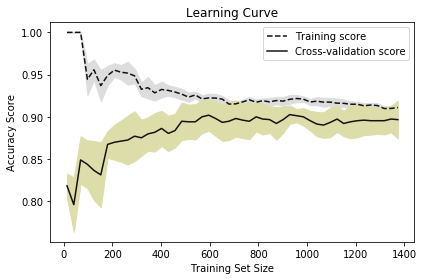

In [0]:
#plotting the learning curve
# Create CV training and test scores for various training set sizes
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel = 'linear'), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

plot_learning_curve(train_sizes,train_scores,test_scores, curve_name = 'SVM linear kernel')

Plotting learning curve for SVM Gaussian kernel


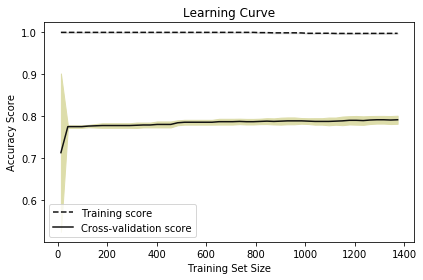

In [0]:
#plotting the learning curve for SVM with Gaussian kernel
# Create CV training and test scores for various training set sizes
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel = 'rbf'), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

plot_learning_curve(train_sizes,train_scores,test_scores, curve_name = 'SVM Gaussian kernel')

Hyperparameter Tuning for SVM linear kernel

Learning the maximum iterations value **parameter 1 - max_iter**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


plotting validation curve for max_iter


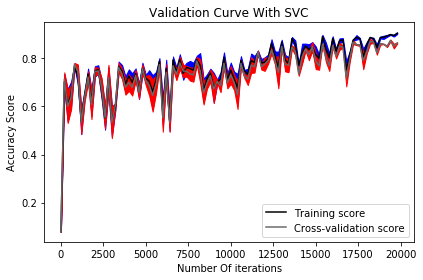

In [0]:
#Learn the hyperparameter maximum iterations 
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')
param_range = np.arange(0, 20000, 200 )

train_scores, test_scores = validation_curve(SVC(kernel = 'linear',cache_size=200), X_train, y_train, param_name = "max_iter",param_range = param_range
                ,scoring = 'accuracy',n_jobs=-1)
plot_validation_curve(train_scores,test_scores,param_name= 'Number of iterations')

Learn the hyperparameter regularization constant **parameter 2 - cost**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


plotting validation curve for Regularization Constant


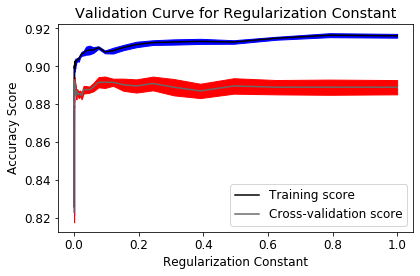

In [0]:
#Learn the hyperparameter regularization constant 
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')

#param_range = np.arange(1, 50, 2 )
param_range = np.logspace(start=-5, stop= 0, base= 10 )

train_scores, test_scores = validation_curve(SVC(kernel = 'linear',cache_size=200), X_train, y_train, param_name = "C",param_range = param_range
                ,scoring = 'accuracy',n_jobs=-1)
plot_validation_curve(train_scores,test_scores,param_name= 'Regularization Constant')

Build a SVM model without modifying the dataset(No ouutlier removal, No feature reduction) **Model 1**

0.8896713615023474
The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.926     0.967     0.946       336
           2      0.690     0.475     0.563        61
           3      0.758     0.862     0.806        29

    accuracy                          0.890       426
   macro avg      0.791     0.768     0.772       426
weighted avg      0.881     0.890     0.882       426



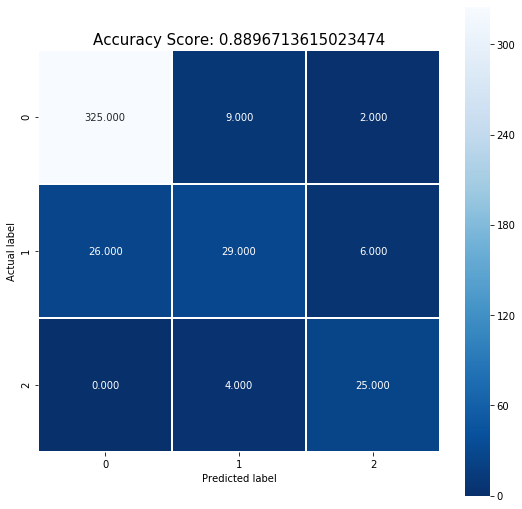

In [0]:
score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_svc(dt,target = 'NSP',kernel = 'linear')
plot_conf_matrix(y_test, y_pred_bin,classes=3)

Draw the ROC curve and calculate the AUC

AUC for this ROC Curve is 0.954398148148148


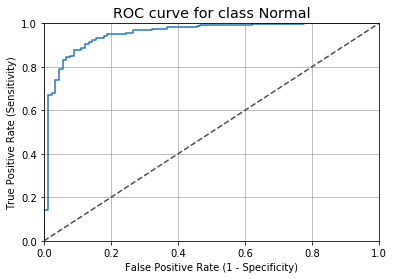

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 0, class_name = 'Normal')

AUC for this ROC Curve is 0.9132270379519425


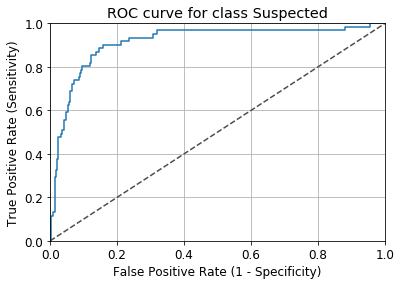

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 1, class_name = 'Suspected')

AUC for this ROC Curve is 0.9894032832450274


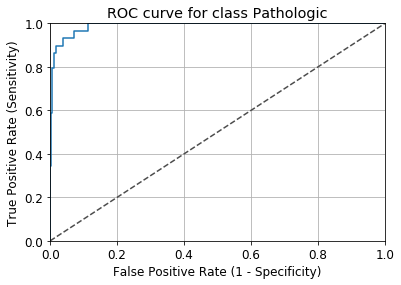

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 2, class_name = 'Pathologic')

Create a dataset with 400 normal and all the pathology and suspected datas

In [0]:
#Extract the rows with suspected and pathological NSP values
path_class  = dt[dt.NSP.isin([2,3])]
#Extraict the rows with Normal NSP value
norm_class = dt[dt.NSP == 1]
#Take first 400 data of Normal class
norm_class = norm_class.iloc[0:400,:]

#Merge normal and pathological dataset
c_dt = pd.concat([path_class,norm_class],ignore_index= True)

#Random shuffle the rows of combined dataset
c_dt = c_dt.sample(frac = 1,random_state=1).reset_index(drop=True)

#Create yet another dataset with reduced number of features
c_dt_sf = c_dt[[ 'ASTV', 'MSTV', 'ALTV', 'Mean', 'NSP']]
print(c_dt_sf.shape)
c_dt_sf.head()

(871, 5)


,ASTV,MSTV,ALTV,Mean,NSP
0,79,0.2,91,130,3
1,22,2.8,0,123,1
2,63,1.3,21,149,2
3,53,2.9,3,147,2
4,60,2.7,0,100,3


Build SVM model for the reduced dataset **- Model 2**

In [0]:
score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_svc(c_dt,target = 'NSP',kernel = 'linear')


0.8628571428571429


The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.877     0.877     0.877        81
           2      0.803     0.817     0.810        60
           3      0.939     0.912     0.925        34

    accuracy                          0.863       175
   macro avg      0.873     0.868     0.871       175
weighted avg      0.864     0.863     0.863       175



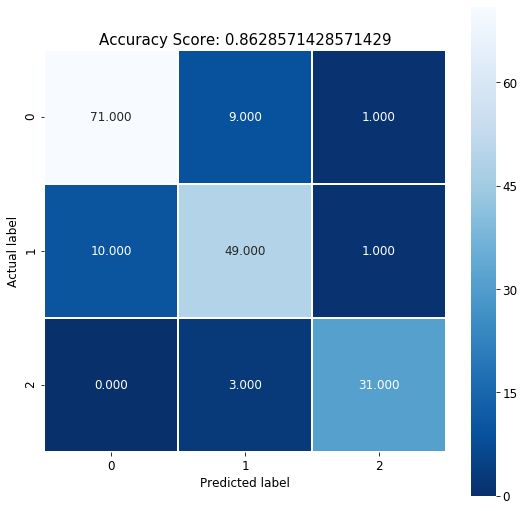

In [0]:
plot_conf_matrix(y_test, y_pred_bin,classes=3)

Build SVM model for data reduced and feature reduced dataset **- Model 3**

In [0]:
score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_svc(c_dt_sf,target = 'NSP',kernel = 'linear')


0.8057142857142857


The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.845     0.877     0.861        81
           2      0.726     0.750     0.738        60
           3      0.862     0.735     0.794        34

    accuracy                          0.806       175
   macro avg      0.811     0.787     0.797       175
weighted avg      0.808     0.806     0.805       175



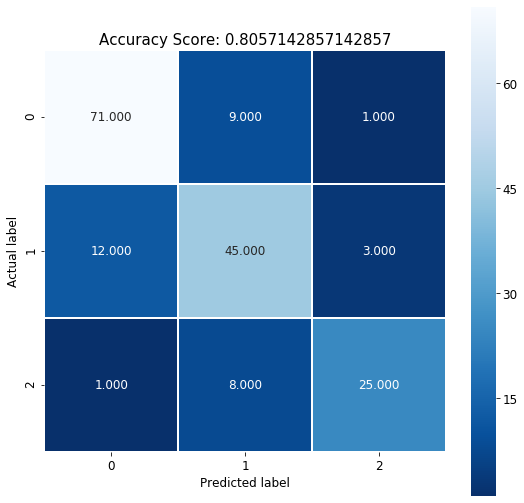

In [0]:
plot_conf_matrix(y_test, y_pred_bin,classes=3)

Build model with the dataset that does not have outliers(Outlier removal from the whole dataset) **- Model 4**

In [0]:
#Build model with the dataset that does not have outliers(Outlier removal from the whole dataset)
score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_svc(dt_no_out,target = 'NSP',kernel = 'linear',class_weight='balanced')


0.8485639686684073


The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.968     0.869     0.916       312
           2      0.562     0.763     0.647        59
           3      0.391     0.750     0.514        12

    accuracy                          0.849       383
   macro avg      0.641     0.794     0.692       383
weighted avg      0.887     0.849     0.862       383



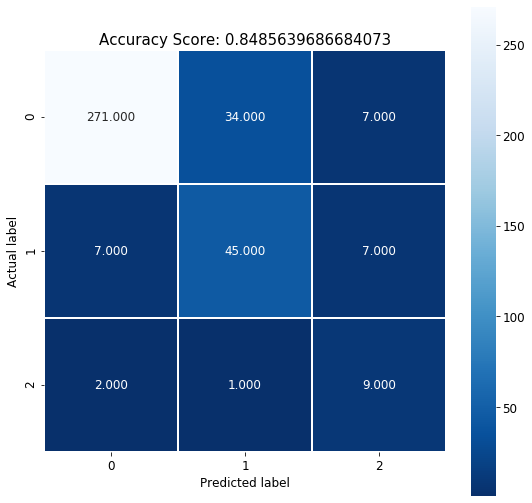

In [0]:
plot_conf_matrix(y_test, y_pred_bin,classes=3)

Build model with the dataset that does not have outliers(Outlier removal from each class of the dataset seperately) **- Model 5**

In [0]:
#Build model with the dataset that does not have outliers(Outlier removal from each class of the dataset seperately) **- Model 5**
score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_svc(outlierless_dt,target = 'NSP',kernel = 'linear',class_weight='balanced',C= 0.1)


0.8328981723237598


The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.984     0.822     0.896       303
           2      0.427     0.814     0.560        43
           3      0.729     0.946     0.824        37

    accuracy                          0.833       383
   macro avg      0.713     0.861     0.760       383
weighted avg      0.897     0.833     0.851       383



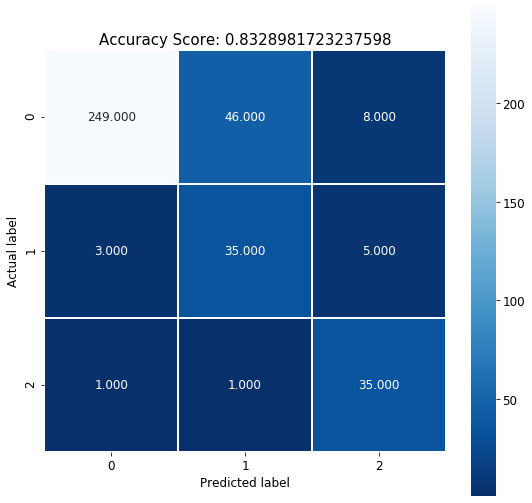

In [0]:
plot_conf_matrix(y_test, y_pred_bin,classes=3)

AUC for this ROC Curve is 0.9579207920792079


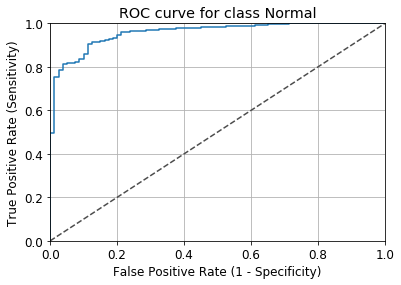

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 0, class_name = 'Normal')

AUC for this ROC Curve is 0.9428864569083446


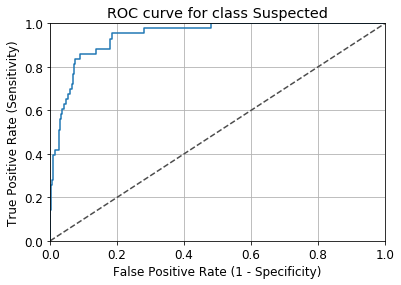

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 1, class_name = 'Suspected')

AUC for this ROC Curve is 0.9899234494610217


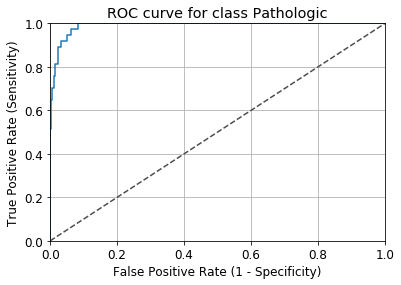

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 2, class_name = 'Pathologic')

**Build SVM model with selected features Model 6**

In [0]:
#Build model with the dataset that does not have outliers(Outlier removal from each class of the dataset seperately) **- Model 5**
score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_svc(final_dt,target = 'NSP',kernel = 'linear',class_weight='balanced',C= 0.1)


0.8407310704960835


The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.992     0.832     0.905       303
           2      0.480     0.837     0.610        43
           3      0.630     0.919     0.747        37

    accuracy                          0.841       383
   macro avg      0.701     0.863     0.754       383
weighted avg      0.900     0.841     0.857       383



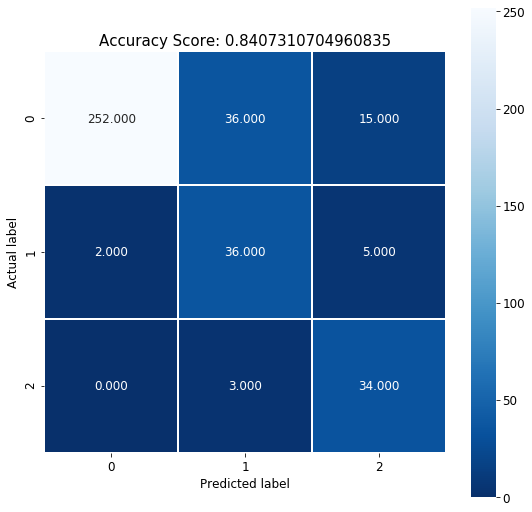

In [0]:
plot_conf_matrix(y_test, y_pred_bin,classes=3)

AUC for this ROC Curve is 0.9600247524752475


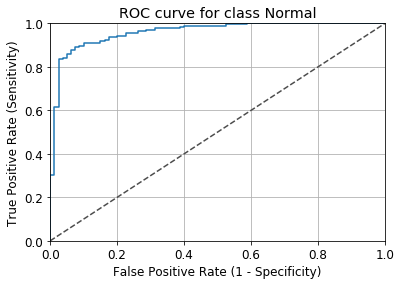

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 0, class_name = 'Normal')

AUC for this ROC Curve is 0.9396032831737346


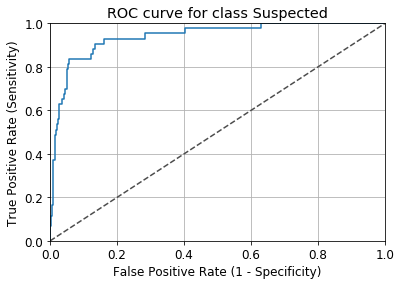

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 1, class_name = 'Suspected')

AUC for this ROC Curve is 0.9600247524752475


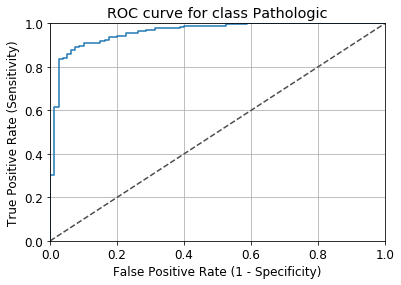

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 0, class_name = 'Pathologic')



**Logistic regression analysis**

1.   Learning curve
2.   Max_iter tuning 
3.   build model
4.   confusion matrix and performance metrics
5.   ROC curve



1. Learning curve

Plotting learning curve for Logistic regression


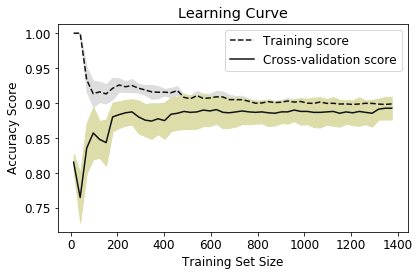

In [0]:
#plotting the learning curve
# Create CV training and test scores for various training set sizes
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

plot_learning_curve(train_sizes,train_scores,test_scores, curve_name = 'Logistic regression')

2. Maximum iterations tuning

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


plotting validation curve for Maximum iterations


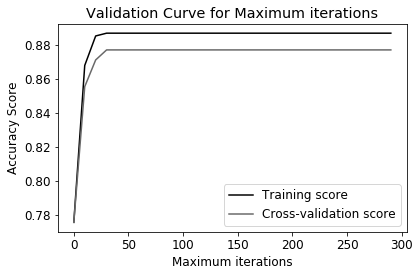

In [0]:
#Learn the hyperparameter maximum iterations 
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')
param_range = np.arange(0, 300, 10 )

train_scores, test_scores = validation_curve(LogisticRegression(class_weight = 'balanced'), X_train, y_train, param_name = "max_iter",param_range = param_range
                ,scoring = 'accuracy',n_jobs=-1)
plot_validation_curve2(train_scores,test_scores,param_name= 'Maximum iterations')

2.1 Learn the hyperparameter regularization constant

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


plotting validation curve for Regularization Constant


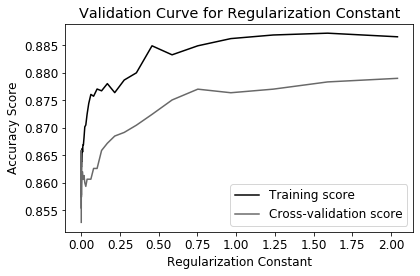

In [0]:
#Learn the hyperparameter regularization constant 
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')

#param_range = np.arange(.1, 2, .1 )
param_range = np.logspace(start=-5, stop= .31, base= 10 )
train_scores, test_scores = validation_curve(LogisticRegression(class_weight = 'balanced'), X_train, y_train, param_name = "C",param_range = param_range
                ,scoring = 'accuracy',n_jobs=-1)
plot_validation_curve2(train_scores,test_scores,param_name= 'Regularization Constant')

In [0]:
#Train the logistic regression model using the tuned hyperparameters
score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_logistic_regression(outlierless_dt,'NSP',max_iter=50,class_weight='balanced',C=0.8)

0.804177545691906


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.980     0.789     0.874       303
           2      0.391     0.791     0.523        43
           3      0.673     0.946     0.787        37

    accuracy                          0.804       383
   macro avg      0.681     0.842     0.728       383
weighted avg      0.884     0.804     0.826       383



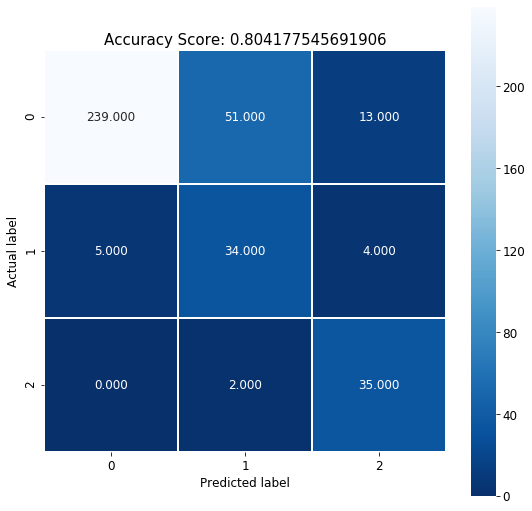

In [0]:
plot_conf_matrix(y_test, y_pred_bin,classes=3)

AUC for this ROC Curve is 0.9393564356435643


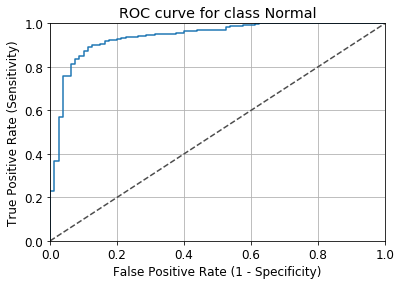

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 0, class_name = 'Normal')

AUC for this ROC Curve is 0.8952804377564979


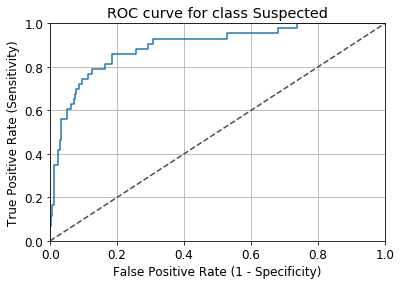

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 1, class_name = 'Suspected')

AUC for this ROC Curve is 0.9875019528198719


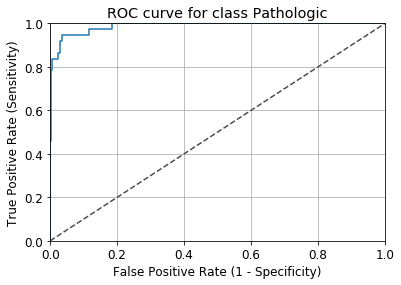

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 2, class_name = 'Pathologic')

Determine the variable importances for logistic regression

In [0]:
#Determine the variable importances for logistic regression

**Logistic regression model with selected features**

In [0]:
#Make a logistic regression model using mrmr selected features
score,cm,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_logistic_regression(final_dt,'NSP',max_iter=50,class_weight='balanced',C=0.8)

0.8120104438642297


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.976     0.802     0.880       303
           2      0.407     0.767     0.532        43
           3      0.660     0.946     0.778        37

    accuracy                          0.812       383
   macro avg      0.681     0.838     0.730       383
weighted avg      0.882     0.812     0.831       383



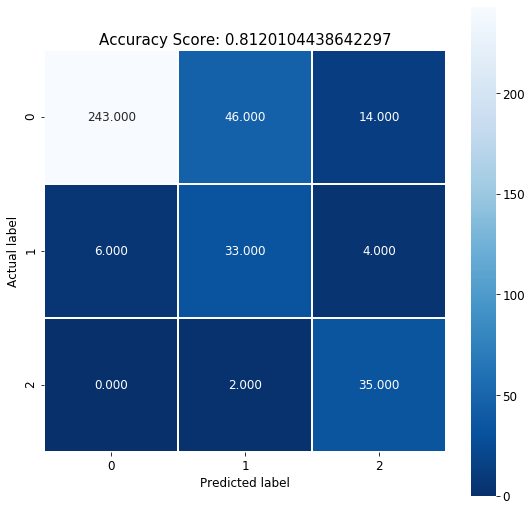

In [0]:
plot_conf_matrix(y_test, y_pred_bin,classes=3)

AUC for this ROC Curve is 0.9396039603960397


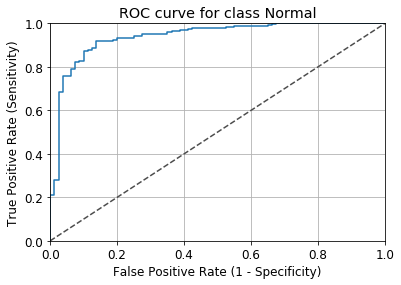

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 0, class_name = 'Normal')

AUC for this ROC Curve is 0.8879616963064295


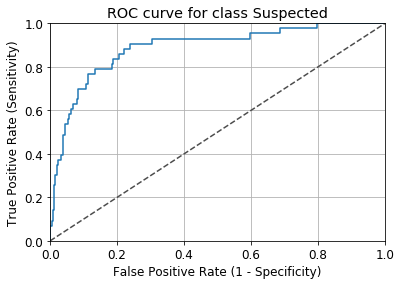

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 1, class_name = 'Suspected')

AUC for this ROC Curve is 0.9875800656147478


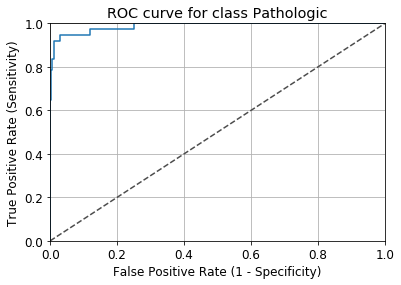

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 2, class_name = 'Pathologic')

**3. Random Forest Analysis**

1.   Plot Learning curve
2.   Tune number of trees
3.   Tune maximum depth of trees
4.   Build model
5.   confusion matrix and performance metrics
6.   ROC and AUC
7.   variable importances 



1. plot learning curve for random forest

Plotting learning curve for Random Forest


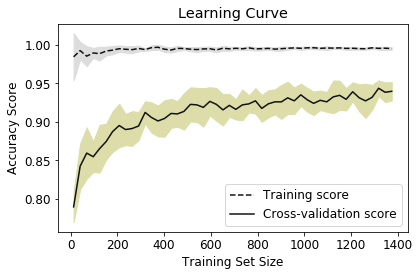

In [0]:
#plotting the learning curve
# Create CV training and test scores for various training set sizes
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(class_weight='balanced'), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

plot_learning_curve(train_sizes,train_scores,test_scores, curve_name = 'Random Forest')

2. validation curve for number of trees

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


plotting validation curve for number of trees


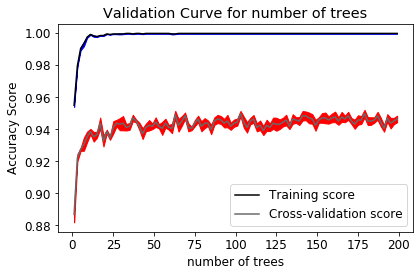

In [0]:
#Learn the hyperparameter maximum iterations 
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')
param_range = np.arange(1, 200, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(class_weight = 'balanced'), X_train, y_train, param_name = "n_estimators",param_range = param_range
                ,scoring = 'accuracy',n_jobs=-1)
plot_validation_curve(train_scores,test_scores,param_name= 'number of trees')

3. Tune the parameter max_depth

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


plotting validation curve for Tree depth


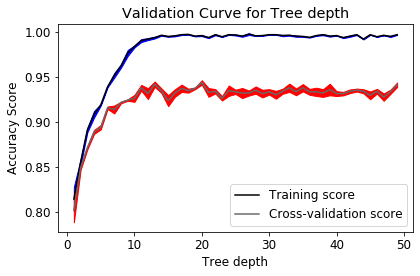

In [0]:
#Learn the hyperparameter max_depth
X_train, X_test, y_train, y_test = split_data(outlierless_dt,target='NSP')
param_range = np.arange(1, 50, 1)

train_scores, test_scores = validation_curve(RandomForestClassifier(class_weight = 'balanced'), X_train, y_train, param_name = "max_depth",param_range = param_range
                ,scoring = 'accuracy',n_jobs=-1)
plot_validation_curve(train_scores,test_scores,param_name= 'Tree depth')

4. Build model

In [0]:
#Build a random forest model with preprocessed dataset and balanced class weights
score,cm,tree,importances,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_random_forest(outlierless_dt,'NSP',max_depth=10, n_estimators=500,class_weight='balanced')

0.9530026109660574


The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.980     0.970     0.975       303
           2      0.760     0.884     0.817        43
           3      1.000     0.892     0.943        37

    accuracy                          0.953       383
   macro avg      0.913     0.915     0.912       383
weighted avg      0.957     0.953     0.954       383



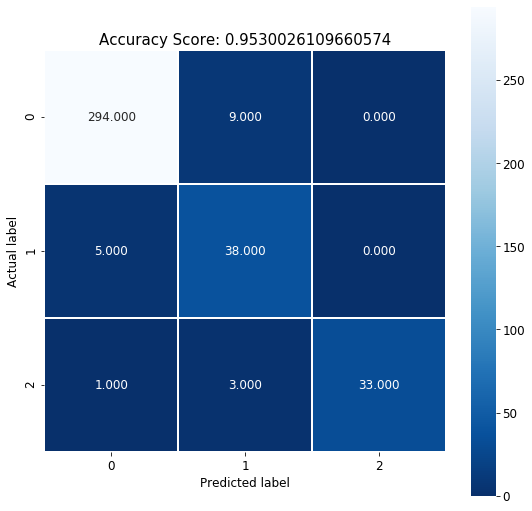

In [0]:
plot_conf_matrix(y_test, y_pred_bin,classes=3)

AUC for this ROC Curve is 0.9916666666666667


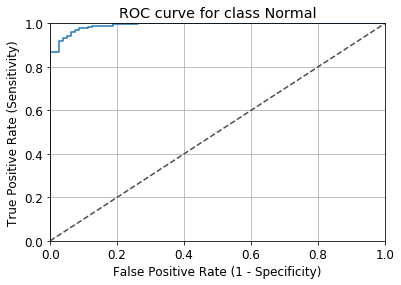

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 0, class_name = 'Normal')

AUC for this ROC Curve is 0.9856361149110806


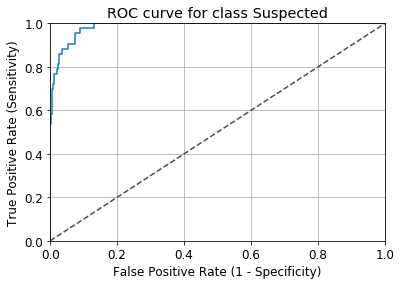

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 1, class_name = 'Suspected')

AUC for this ROC Curve is 0.9988283080768631


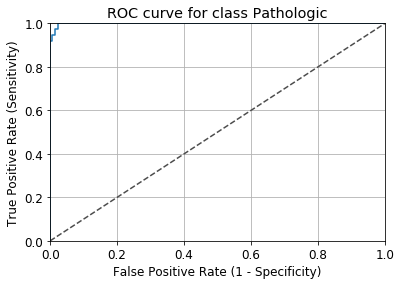

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 2, class_name = 'Pathologic')

In [0]:
#compute the variable importances
rf_var_importance(importances,X_train)

Variable: ASTV                 Importance: 0.15
Variable: ALTV                 Importance: 0.13
Variable: Mean                 Importance: 0.1
Variable: MSTV                 Importance: 0.08
Variable: AC                   Importance: 0.07
Variable: Median               Importance: 0.07
Variable: MLTV                 Importance: 0.06
Variable: Mode                 Importance: 0.06
Variable: DP                   Importance: 0.05
Variable: LB                   Importance: 0.04
Variable: Variance             Importance: 0.04
Variable: Width                Importance: 0.03
Variable: Min                  Importance: 0.03
Variable: UC                   Importance: 0.02
Variable: Max                  Importance: 0.02
Variable: FM                   Importance: 0.01
Variable: DL                   Importance: 0.01
Variable: Nmax                 Importance: 0.01
Variable: DS                   Importance: 0.0
Variable: Nzeros               Importance: 0.0
Variable: Tendency_left_asymmetric Importan

**Build random forest with selected features**

In [0]:
#Build a random forest model with preprocessed dataset and balanced class weights
score,cm,tree,importances,y_predict,y_pred_quant,y_pred_bin,X_train, X_test, y_train, y_test = custom_random_forest(final_dt,'NSP',max_depth=10, n_estimators=500,class_weight='balanced')

0.9530026109660574


The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.974     0.977     0.975       303
           2      0.800     0.837     0.818        43
           3      0.971     0.892     0.930        37

    accuracy                          0.953       383
   macro avg      0.915     0.902     0.908       383
weighted avg      0.954     0.953     0.953       383



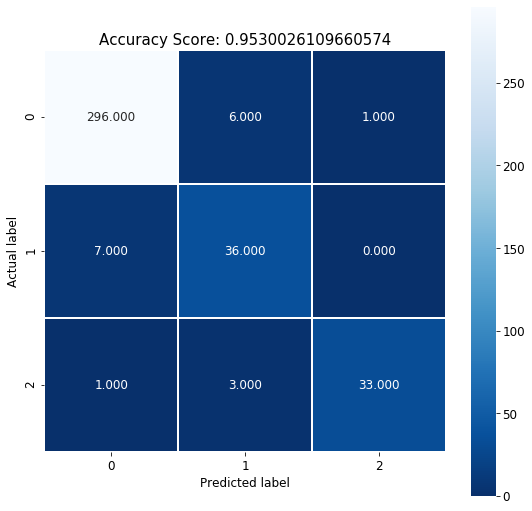

In [0]:
plot_conf_matrix(y_test, y_pred_bin,classes=3)

AUC for this ROC Curve is 0.9791254125412542


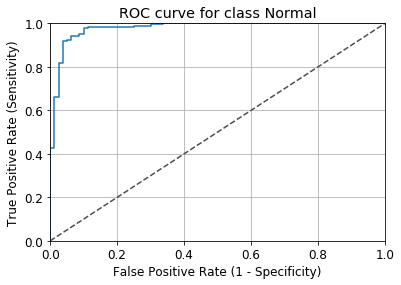

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 0, class_name = 'Normal')

AUC for this ROC Curve is 0.9718878248974008


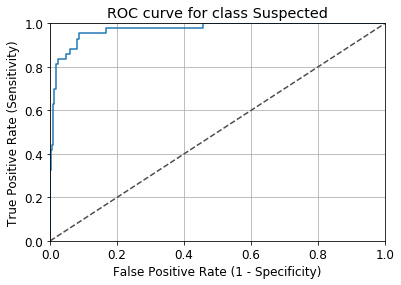

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 1, class_name = 'Suspected')

AUC for this ROC Curve is 0.9928917356663021


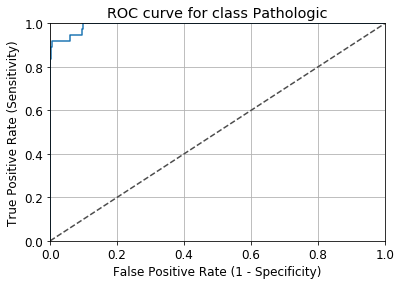

In [0]:
plot_roc_auc(y_test,y_pred_quant, classno = 2, class_name = 'Pathologic')